***OBJETIVOS:***

>- Este notebook tiene por objetivo realizar pronósticos sobre series de tiempo, empleando modelos de RNN de tipo LSTM con algunas de las técnicas de aumento de imágenes más utilizadas, con ejemplos de código y visualización de imágenes tras el aumento.
>- Los datos se conciben como imágenes y se utiliza Tensorflow u OpenCV escrito en Python.

***CONTENIDO:***

***Técnicas utilizadas:***
1. Escalado
2. Traslación
3. Rotación (a 90 grados)
4. Rotación (en ángulos más finos)
5. Volteo
6. Añadir ruido de sal y pimienta
7. Condición de iluminación
8. Transformación de perspectiva


# **FORECASTING CON REDES LSTM - PARTE 1: PREPARACIÓN DE LOS DATOS - Preprocesamiento y Análisis de Datos**

***REF:***

- https://colab.research.google.com/drive/1KH5zI5hC-ctMbfVunXI1tEBMPOUKVazo?usp=share_link#scrollTo=QiP8J5o6qgvN
- https://www.codificandobits.com/blog/series-de-tiempo-redes-lstm-preparacion-datos/
- Miguel Sotaquirá (2023). Forecasting con Redes LSTM, Abril 28, 2023: https://www.codificandobits.com/blog/series-de-tiempo-redes-lstm-prediccion-univariada-unistep/

## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [Procesamiento inicial del dataset](#scrollTo=vd5lyqNrlfFg&line=1&uniqifier=1)
6. [Análisis exploratorio](#scrollTo=agblCRwTm6l0&line=1&uniqifier=1)
7. [Pre-procesamiento](#scrollTo=VTf7ia-cy5PB&line=1&uniqifier=1)
8. [Conclusión](#scrollTo=Vkg8weU_0jHD&line=1&uniqifier=1)

##2. El set de datos

Usaremos el [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos del Instituto Planck para Biogeoquímica que contiene el registro histórico de diferentes variables climáticas.

En particular:

- Contiene 14 diferentes *features* (temperatura del aire, presión atmosférica, humedad, etc.)
- Cada variable ha sido recolectada con una periodicidad de 1 hora comenzando en el año 2009.

En este caso usaremos datos recolectados entre 2009 y 2015.

##3. El problema a resolver

Desarrollar modelos predictivos basados en redes LSTM usando los enfoques:

1. Univariado + single-step
2. Univariado + multi-step
3. Multivariado + single-step
4. Multivariado + multi-step

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **PARTE I: Preparación de los Datos**

##4. Lectura del set de datos

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer set de datos

ruta = "/content/drive/MyDrive/DataSet/Weather/"
df = pd.read_csv(ruta+'weather_dataset_CB.csv')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50220,2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50221,2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50222,2014-09-24 15:00:00,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


Originalmente el dataset contiene 50.224 registros y 15 variables.

##5. Procesamiento inicial del dataset

El primer paso consiste en convertir la columna *Date Time* del formato *object* (string + datos numéricos) al formato *datetime*.

Esto facilitará la visualización del set de datos y el análisis exploratorio, así como el pre-procesamiento:

In [5]:
# Verifiquemos que el tipo de dato es "object"
df['Date Time'].dtype

dtype('O')

In [11]:
import datetime

In [12]:
# Pasar la columna "Date Time" al formato datetime
df['datetime'] = pd.to_datetime(
    df['Date Time'],
    format = '%Y.%m.%d %H:%M:%S'
)

# Fijemos esta nueva columna como índice del DataFrame
df = df.set_index('datetime')

# Ordenemos el dataset de forma ascendente según "datetime"
df.sort_index(inplace=True)

# Y finalmente eliminemos la columna "Date Time" original
df = df.drop(columns=['Date Time'])
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5


##6. Análisis exploratorio

***PRIMER PASO***

El primer paso en este análisis es entender las [variables de nuestro dataset](https://www.bgc-jena.mpg.de/wetter/Weatherstation.pdf) (https://www.bgc-jena.mpg.de/wetter/Weatherstation.pdf):

- *p (mbar)*: presión del aire en milibars
- *T (degC)*: temperatura del aire en °C
- *Tpot (K)*: temperatura potencial
- *Tdew (degC)*: temperatura de punto de rocío (a la cual el vapor de agua se condensa)
- *rh (%)*: humedad relativa
- *VPmax (mbar)*: presión de vapor de agua de saturación
- *VPact (mbar)*: presión de vapor de agua real
- *VPdef (mbar)*: déficit de presión de vapor de agua
- *sh (g/kg)*: humedad específica
- *H2OC (mmol/mol)*: nivel de concentración del vapor de agua
- *rho (g/m**3)*: densidad del aire
- *wv (m/s)*: velocidad del viento
- *max. wv (m/s)*: velocidad del viento máxima
- *wd (deg)*: dirección del viento

Tendremos dos tipos de variables al momento de implementar los modelos LSTM:

- Variable a predecir: la variable a pronosticar (salida del modelo LSTM). En este caso es *T (degC)*
- Variables predictoras (o covariables): las variables de entrada al modelo LSTM a partir de las cuales se realizará la predicción.
  - Puede incluir la variable a predecir (*T (degC)*)
  - Puede incluir la variable tiempo (columna *datetime*)

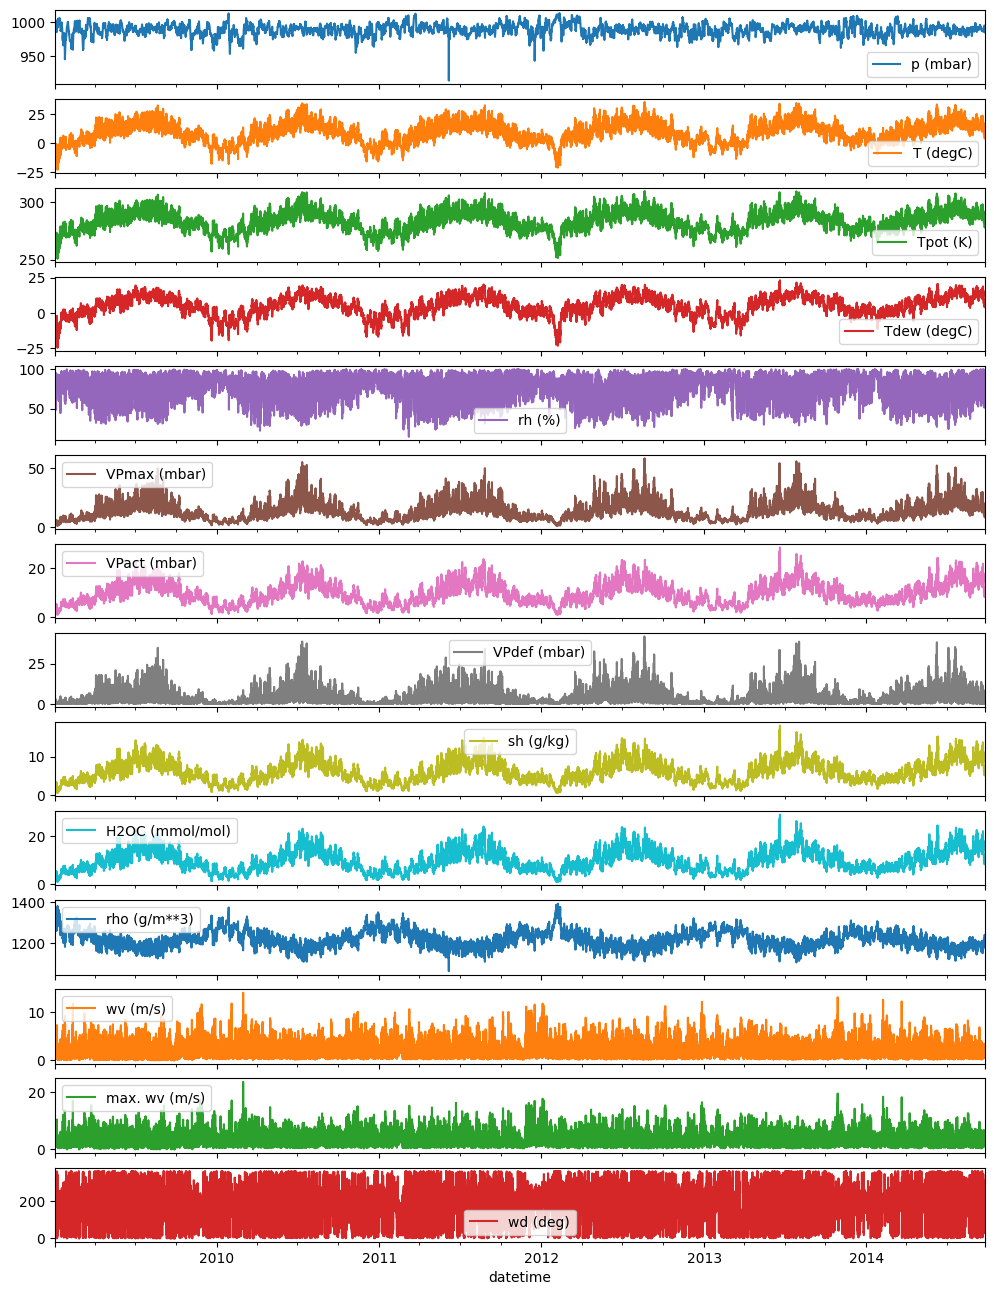

In [13]:
# Dibujemos nuestras variables
cols = df.columns

# N = 24*30*12 # Dibujar 1 año continuo
N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(12,16))

**Observaciones**:
- Las variables tienen diferentes rangos de amplitud. Antes de llevar los datos a la Red LSTM debemos escalarlas/estandarizarlas.
- Al parecer existe un *outlier* en la presión (aproximadamente 950 mbars). Sin embargo este dato es normal, pues la presión puede variar entre 100 y 1.050

***SEGUNDO PASO:***

El segundo paso es verificar si existen datos faltantes:

In [14]:
# Verificar si hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


Las columnas *VPmax (mbar)*, *H2OC (mmol/mol)* y *rho (g/m**3)* tienen datos faltantes. En un momento realizaremos el manejo de estos datos.

***TERCER PASO:***

El tercer paso es garantizar que la periodicidad de las muestras es exactamente de 1 hora:

In [15]:
# Verificar si la periodicidad de las muestras es exactamente
# 1 hora (3600 secs)

# Calcular diferencias (en segundos) entre cada par de datos
# consecutivos
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

3600.0    50223
Name: datetime, dtype: int64


Vemos que:

- 61 pares de registros tienen diferencias de 1.800 s (30 min)
- 24 pares de registros tienen diferencias de 0.0 s
- 2 pares de registros tienen diferencias de 4200 s (1.16 hrs)
- 1 par de registros tiene diferencias de 4.800 s (1.3 hrs)

En un momento veremos cómo corregir este comportamiento.

## 7. Pre-procesamiento

Realizaremos dos tareas:
- Manejo de datos faltantes
- Ajuste de la periodicidad del dataset

### 7.1. Manejo de datos faltantes

Dado el reducido número de datos faltantes, podemos usar una simple interpolación para completarlos:

In [16]:
# Interpolación lineal para completar datos faltantes
columns = ['VPmax (mbar)', 'H2OC (mmol/mol)', 'rho (g/m**3)']

for column in columns:
    df[column] = df[column].interpolate(method='linear')

# Verificar que no hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


### 7.2. Ajuste de la periodicidad del dataset

Recordemos que hay:

- 61 pares de registros con diferencias de 1.800 s (30 min)
- 24 pares de registros con diferencias de 0.0 s
- 2 pares de registros con diferencias de 4200 s (1.16 hrs)
- 1 par de registros con diferencias de 4.800 s (1.3 hrs)


Corrijamos los pares de registros con diferencias de 0.0s que son simplemente registros repetidos:

In [17]:
# Eliminar duplicados para corregir el problema de diferencias
# de 0.0 s
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

# Y verificar que han sido eliminados
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

3600.0    50223
Name: datetime, dtype: int64


Y ahora corrijamos los datos restantes para garantizar que entre pares de datos consecutivos habrá una periodicidad de 1 hora.

Usaremos el método *asfreq* de Pandas. Como aparecerán nuevos datos, usaremos el método *bfill* para rellenar estos nuevos datos:

In [18]:
# Reinterpolar el dataset con una periodicidad de 1 hora
df2 = df.asfreq(freq='H', method='bfill')

# Y verificar que la totalidad del dataset tiene esta periodicidad
df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

3600.0    50223
Name: datetime, dtype: int64


In [19]:
# Verificar que el dataset resultante no contiene NaNs:
print('Cantidad de NaNs:')
for column in df:
    nans = df2[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


In [20]:
# Y finalmente verificar las columnas originales y modificadas
# para constatar que los valores promedio no cambian

for column in df:
    print(f'Promedios original/modificado: {df[column].mean():.2f}/{df2[column].mean():.2f}')

Promedios original/modificado: 988.66/988.66
Promedios original/modificado: 9.25/9.25
Promedios original/modificado: 283.34/283.34
Promedios original/modificado: 4.77/4.77
Promedios original/modificado: 76.02/76.02
Promedios original/modificado: 13.46/13.46
Promedios original/modificado: 9.47/9.47
Promedios original/modificado: 3.99/3.99
Promedios original/modificado: 5.98/5.98
Promedios original/modificado: 9.58/9.58
Promedios original/modificado: 1216.31/1216.31
Promedios original/modificado: 2.15/2.15
Promedios original/modificado: 3.55/3.55
Promedios original/modificado: 173.42/173.42


En este punto ya contamos con un dataset íntegro (no contiene datos faltantes ni *outliers* y tiene una periodicidad de 1 hora).

Solo nos resta guardarlo:

In [21]:
df2.to_csv(ruta+'weather_dataset_CB_preprocesado16Nov2023.csv')

## 8. Conclusión

Aunque cada proyecto tendrá sus particularidades, en general el análisis exploratorio y pre-procesamiento de la serie de tiempo requerido para trabajar con Redes LSTM implica:

- Entender las variables que ingresarán al modelo (variable a predecir y variables predictoras)
- Realizar el manejo de datos faltantes (si existen) y *outliers* (si existen)
- Garantizar que entre muestras consecutivas existe la misma periodicidad

Este dataset será el punto de partida para todos los modelos de Redes LSTM que pueden implementarse más adelante, comenzando el modelo más simple: univariado + uni-step., en la PARTE II siguiente


================================ oooooooooooooooo    ====================================================

# **PARTE II: LSTM - FORECASTING CON REDES LSTM - PARTE 2: MODELO UNIVARIADO - UNISTEP**


- El modelo univariado-unistep es el tipo de predicción más simple que podemos realizar usando Redes LSTM.
- En este tipo de configuración usamos una variable a la entrada del modelo y tendremos una variable de salida y la predicción se realiza tan sólo un instante de tiempo a futuro dentro de la serie.

## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [Pre-procesamiento](#scrollTo=vd5lyqNrlfFg)
6. [Creación y entrenamiento del modelo](#scrollTo=016D9eVw3Beb)
7. [Desempeño del modelo](#scrollTo=ZkI9vr5S69i_)
8. [Predicciones con el modelo entrenado](#scrollTo=fvqk4f8L3aXE&line=1&uniqifier=1)
9. [Conclusiones y sugerencias](#scrollTo=0AFY2trj_KLo&line=1&uniqifier=1)

## 1. Introducción

Anteriormente se ha planteado las fases involucradas en el análisis exploratorio y la preparación del set de datos requeridas en la implementación de los modelos LSTM para pronosticar el comportamiento de la serie de tiempo.

En esta parte del Caso de Uso (Parte II) se verá el primer tipo de Red LSTM más sencillo para realizar la predicción: el modelo univariado - unistep.

La idea es predecir el comportamiento de la temperatura una hora a futuro (de ahí el término unistep) usando como entrada al modelo sólo el registro histórico de la temperatura (de ahí el término univariado).

##2. El set de datos

Recordar que se está usando el  [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos que contiene el registro histórico de 14 diferentes variables climáticas en el período entre 2009 y 2015.

En el análisis exploratorio del dataset se considera que se ha realziadoel siguiente pre-procesamiento:

1. Hicimos el manejo de datos faltantes
2. Verificamos que el dataset no tuviese valores extremos
3. Re-interpolamos el dataset para garantizar una periodicidad de 1 hora

##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque univariado + single-step:

![](https://drive.google.com/uc?export=view&id=14gH53G5kjyUCzzveosDD3mtJ5LQ8uLVx)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##4. Lectura del set de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer set de datos

ruta = "/content/drive/MyDrive/DataSet/Weather/"
df = pd.read_csv(ruta+'weather_dataset_CB.csv')
df

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer set de datos
#ruta = '/gdrive/MyDrive/02-CODIFICANDOBITS.COM/05-YouTube/02-Videos/2023-04-21-LSTMSeriesTiempo-PreparaciónDatos/release/data/'

ruta = "/content/drive/MyDrive/DataSet/Weather/"
df = pd.read_csv(ruta+'weather_dataset_CB_preprocesado16Nov2023.csv')
df

,datetime,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50220,2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50221,2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50222,2014-09-24 15:00:00,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


Originalmente el dataset contiene 50.224 registros y 15 variables.

##5. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%)
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

Veamos cada una de estas fases.

### 5.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

In [23]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df['T (degC)'])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (40179,)
Tamaño set de validación: (5022,)
Tamaño set de prueba: (5023,)


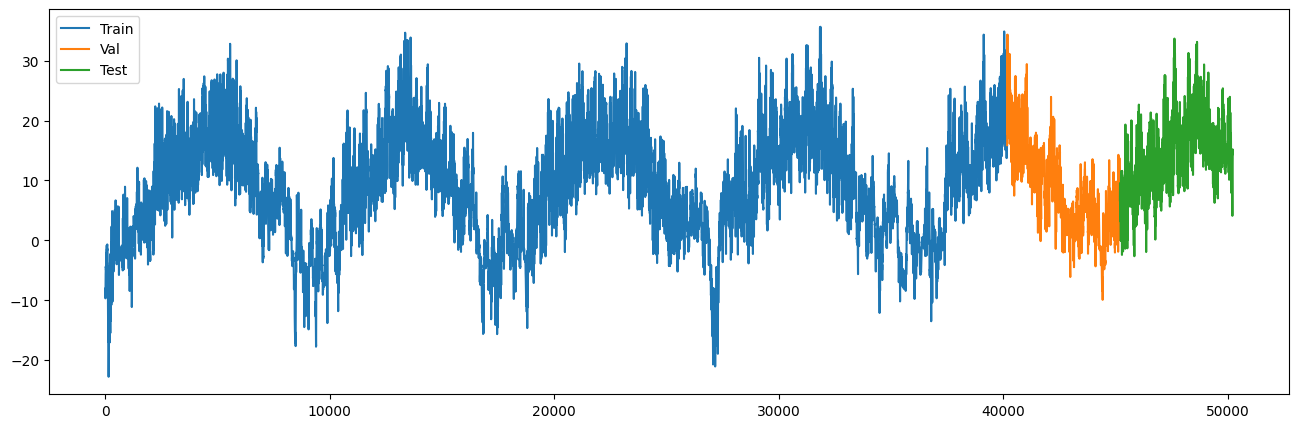

In [24]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

Observemos que por ser un modelo univariado sólo estamos preservando la variable temperatura (y que incluso hemos eliminado la información de fecha y hora de cada registro).

###5.2 Generación del dataset supervisado (entrada y salida del modelo)

Debemos ajustar nuestro set de datos de acuerdo a lo especificado en la [documentación de las Redes LSTM en TensorFlow/Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM):

![](https://drive.google.com/uc?export=view&id=14Sb7zIdjurirW-C6-DWDTvpxOVafTnTK)

Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 1 (feature) correspondiente a la entrada
- Un arreglo de 1 (hora) x 1 (feature) correspondiente a la hora 25 (a predecir):

![](https://drive.google.com/uc?export=view&id=1uJeqYz9Hm2Q3LmEpXhZHogOI_rhj7YC2)

Crearemos una función que podremos reutilizar más adelante para implementar modelos más complejos:

In [25]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [26]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (40154, 24, 1), y_tr: (40154, 1, 1)
Set de validación - x_vl: (4997, 24, 1), y_vl: (4997, 1, 1)
Set de prueba - x_ts: (4998, 24, 1), y_ts: (4998, 1, 1)


###5.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [27]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]


    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs: en este caso debemos garantizar que cada dato de entrada
    # a fit_transform o transform debe ser de tamaño nsamples x nfeatures
    # (en este caso 24x13)
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [28]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


Min x_tr/x_vl/x_ts sin escalamiento: -22.76/-9.92/-2.64
Min x_tr/x_vl/x_ts con escalamiento: -1.0/-0.5603492552645094/-0.31107687039890414

Min y_tr/y_vl/y_ts sin escalamiento: -22.76/-9.92/-2.64
Min y_tr/y_vl/y_ts con escalamiento: -1.0/-0.5603492552645094/-0.31107687039890414

Max x_tr/x_vl/x_ts sin escalamiento: 35.65/34.34/33.68
Max x_tr/x_vl/x_ts con escalamiento: 1.0000000000000002/0.9551446670090742/0.932545796952577

Max y_tr/y_vl/y_ts sin escalamiento: 35.65/31.33/33.68
Max y_tr/y_vl/y_ts con escalamiento: 1.0000000000000002/0.8520801232665642/0.932545796952577


##6. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 1)
- Salidas: arreglos *y* (batches x output-length x features = batches x 1 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

$RMSE = \sqrt{\frac{\sum_i (y_i-\hat{y_i})^2}{N}}$

donde:
- $y$: temperatura real
- $\hat{y}$: temperatura predicha
- $N$: cantidad de predicciones

In [29]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
157/157 - 8s - loss: 0.2264 - val_loss: 0.1034 - 8s/epoch - 51ms/step
Epoch 2/80
157/157 - 1s - loss: 0.1218 - val_loss: 0.0937 - 608ms/epoch - 4ms/step
Epoch 3/80
157/157 - 1s - loss: 0.1102 - val_loss: 0.0851 - 620ms/epoch - 4ms/step
Epoch 4/80
157/157 - 1s - loss: 0.0985 - val_loss: 0.0769 - 608ms/epoch - 4ms/step
Epoch 5/80
157/157 - 1s - loss: 0.0849 - val_loss: 0.0673 - 600ms/epoch - 4ms/step
Epoch 6/80
157/157 - 1s - loss: 0.0700 - val_loss: 0.0576 - 580ms/epoch - 4ms/step
Epoch 7/80
157/157 - 1s - loss: 0.0612 - val_loss: 0.0545 - 579ms/epoch - 4ms/step
Epoch 8/80
157/157 - 1s - loss: 0.0578 - val_loss: 0.0520 - 571ms/epoch - 4ms/step
Epoch 9/80
157/157 - 1s - loss: 0.0552 - val_loss: 0.0501 - 574ms/epoch - 4ms/step
Epoch 10/80
157/157 - 1s - loss: 0.0529 - val_loss: 0.0478 - 570ms/epoch - 4ms/step
Epoch 11/80
157/157 - 1s - loss: 0.0508 - val_loss: 0.0460 - 575ms/epoch - 4ms/step
Epoch 12/80
157/157 - 1s - loss: 0.0489 - val_loss: 0.0443 - 576ms/epoch - 4ms/step
Epo

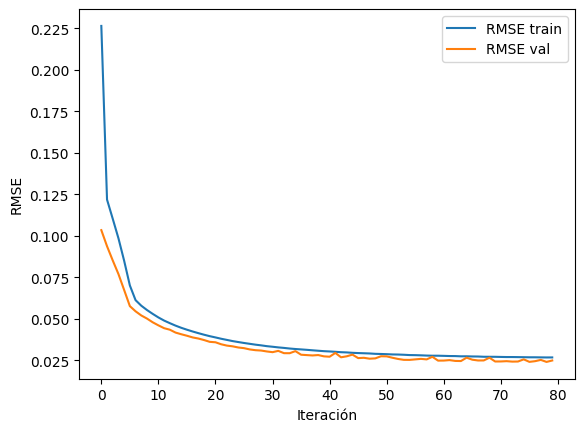

In [31]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [30]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


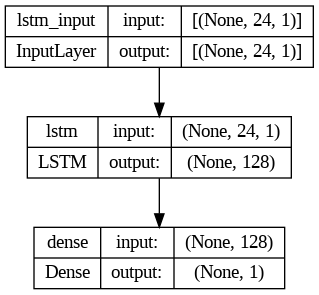

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelo, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

**Observaciones y sugerencias:**

- El modelo no tiene *overfitting*
- Se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación.

Este desempeño es simplemente el RMSE obtenido con cada subset:

In [32]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.025
  RMSE val:	 0.024
  RMSE test:	 0.029


Los desempeños son comparables lo cual quiere decir que el modelo generaliza bastante bien.

##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Creemos primero una función para generar las predicciones:

In [33]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [34]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando las temperaturas originales y las predichas por el modelo para cada uno de los 4.998 datos en el set de prueba:

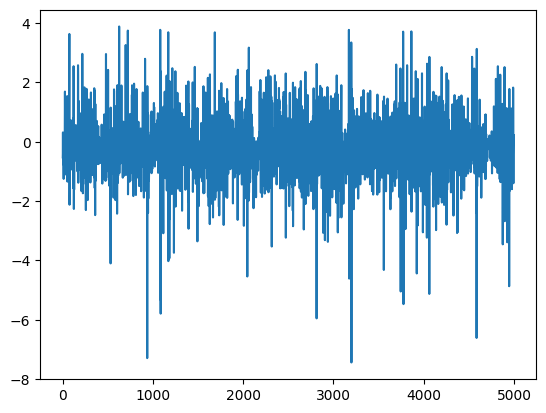

In [35]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +4 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

## 9. Conclusiones y sugerencias

- Hemos entrenado un primer modelo univariado + uni-step
- Hemos visto los elementos a tener en cuenta para el pre-procesamiento de los datos
- Hemos visto el desempeño del modelo usando los datos de prueba y lo hemos comparado con lo obtenido para los sets de entrenamiento y validación
- En promedio el modelo tiene un desempeño adecuado (RMSEs relativamente bajos), aunque esto podría mejorar si se afinan sus hiperparámetros.

En la siguiente parete (Parte III) se tomará como base el código implementado en esta parte (Parte II) para implementar el segundo enfoque predictivo. Así que se implementará una Red LSTM para realizar pronósticos del tipo univariado + multi-step.

# HOMEWORKS:

1. Reducir  los errores, haciendo una afinación del modelo o modificando el enfoque de predicción.
2. Ejecutar los modelos Unistep y Multistep (univariado y multivariado en cada caso).
3. Analizar y mejorar cada modelo.
4. Concluir respecto a todo el caso de uso.

======================================      oooooo     =======================================

# **PARTE III: Forecasting con Redes LSTM - MODELO UNIVARIADO - MULTISTEP**

- En los modelos univariados-multistep ingresamos una única variable al modelo (generalmente la misma variable a predecir) e intentamos predecir el comportamiento de una sola variable pero durante múltiples instantes de tiempo (de allí el término multi-step).

## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [Pre-procesamiento](#scrollTo=vd5lyqNrlfFg)
6. [Creación y entrenamiento del modelo](#scrollTo=016D9eVw3Beb)
7. [Desempeño del modelo](#scrollTo=ZkI9vr5S69i_)
8. [Predicciones con el modelo entrenado](#scrollTo=fvqk4f8L3aXE&line=1&uniqifier=1)
9. [Conclusiones y sugerencias](#scrollTo=0AFY2trj_KLo&line=1&uniqifier=1)

## 1. Introducción
Anteriormente y con lo planteado en las sesiomnes de cáatedra,  se ha visto el un panorama general sobre los tipos de predicción y el pre-procesamiento que debemos hacer sobre los datos, así como la implementación del modelo de predicción más sencillo de todos: la Red LSTM univariada-unistep.

En esta parte del Caso de Uso (Parte III), se verá cómo implmentar una Red LSTM que tome a la entrada una sola variable y que a la salida prediga múltiples instantes de tiempo. Así que veremos cómo implementar un modelo de predicción univariado y multistep.

Se considera como base la mayor parte del código que se implementó en la etapa anterior, aunque se haran algunas modificaciones al pre-procesamiento de los datos y a la Red LSTM para poder generar predicciones multi-step.

##2. El set de datos

Recordemos que estamos usando el  [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos que contiene el registro histórico de 14 diferentes variables climáticas en el período entre 2009 y 2015.

En el segundo video de la serie realizamos el análisis exploratorio del dataset y realizamos este pre-procesamiento:

1. Hicimos el manejo de datos faltantes
2. Verificamos que el dataset no tuviese valores extremos
3. Re-interpolamos el dataset para garantizar una periodicidad de 1 hora

Este será el set de datos que usaremos en este tutorial.

##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque univariado + multi-step:

![](https://drive.google.com/uc?export=view&id=15f7JrWSqoanfqMvselC67AtNWTrdiwPy)

De nuevo la variable de entrada y de salida al modelo seguirá siendo una sóla: la temperatura.

En lo que resta de este tutorial haremos uso de buena parte de la implementación realizada en el video anterior (modelo univariado + uni-step) y nos enfocaremos sólo en algunas diferencias:

- **Pre-procesamiento**: modificaremos la creación del dataset supervisado, para que en lugar de 1 instante de tiempo a futuro el dataset contenga 4 horas de temperatura a futuro
- **Red LSTM**: seguirá aceptando el mismo número de horas consecutivas a la entrada (24 horas) pero generará 4 horas de predicción a la salida.
- **Desempeño del modelo**: como ahora generará 4 instantes de tiempo consecutivos y no sólo 1 durante la predicción, veremos una forma de analizar el desempeño del modelo en este caso.

##4. Lectura del set de datos

Recordemos que usaremos el dataset implementado en el [segundo video de la serie](https://youtu.be/R8MEPGn9sFI), sobre el cual ya hemos hecho un pre-procesamiento previo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer set de datos
ruta = '/content/drive/MyDrive/DataSet/Weather/'
df = pd.read_csv(ruta+'weather_dataset_preprocesado.csv')
df

,datetime,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50220,2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50221,2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50222,2014-09-24 15:00:00,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


##5. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%).
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

En las fases (1) y (3) usaremos la misma implementación del tutorial anterior, así que nos enfocaremos principalmente en la fase (2) (generación del dataset supervisado).

### 5.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df['T (degC)'])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (40179,)
Tamaño set de validación: (5022,)
Tamaño set de prueba: (5023,)


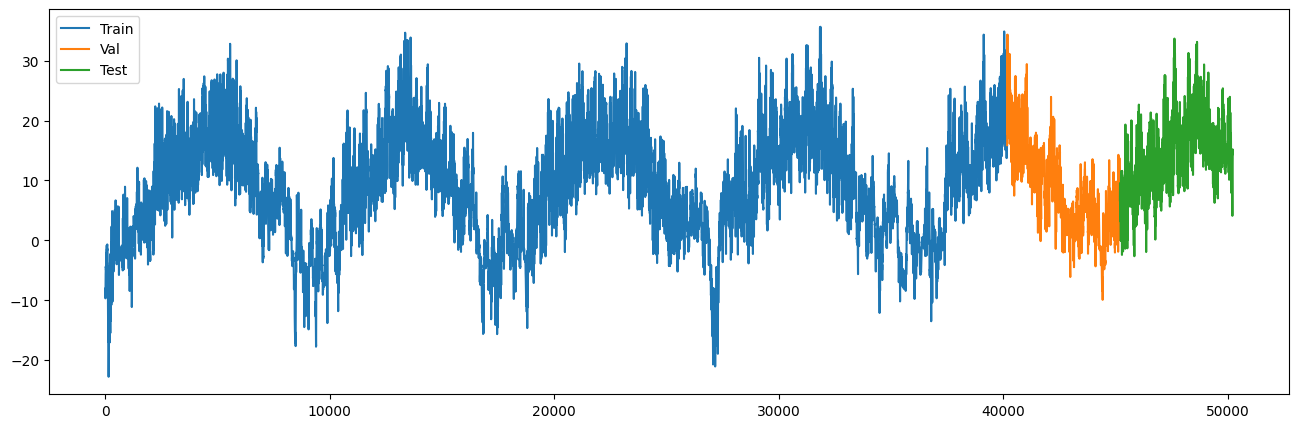

In [ ]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

Observemos que por ser un modelo univariado sólo estamos preservando la variable temperatura (y que incluso hemos eliminado la información de fecha y hora de cada registro).

###5.2 Generación del dataset supervisado (entrada y salida del modelo)

Debemos ajustar nuestro set de datos de acuerdo a lo especificado en la [documentación de las Redes LSTM en TensorFlow/Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM):

![](https://drive.google.com/uc?export=view&id=167iC5It71vi9QrsjFyEHsU3mGyXbCEPe)

Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 1 (feature) correspondiente a la entrada
- Un arreglo de 4 (hora) x 1 (feature) correspondiente a la hora 25 (a predecir):

![](https://drive.google.com/uc?export=view&id=16B13bFGkdMkO2UudYBowp6AAA8szblm-)

La única diferencia con relación al set de datos supervisado usado en el enfoque univariado + uni-step es que a la salida vamos a predecir 4 horas y no sólo 1.

Este parámetro de salida (`OUTPUT_LENGTH = 4`) se convierte en un hiperparámetro que terminará afectando el desempeño de la Red LSTM al momento de hacer las predicciones.

Y usaremos la misma función creada en el tutorial anterior:

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 4    # Modelo uni-step: ***EL ÚNICO CAMBIO QUE DEBEMOS HACER***

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (40151, 24, 1), y_tr: (40151, 4, 1)
Set de validación - x_vl: (4994, 24, 1), y_vl: (4994, 4, 1)
Set de prueba - x_ts: (4995, 24, 1), y_ts: (4995, 4, 1)


###5.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


Min x_tr/x_vl/x_ts sin escalamiento: -22.76/-9.92/-2.64
Min x_tr/x_vl/x_ts con escalamiento: -1.0/-0.5603492552645094/-0.31107687039890414

Min y_tr/y_vl/y_ts sin escalamiento: -22.76/-9.92/-2.64
Min y_tr/y_vl/y_ts con escalamiento: -1.0/-0.5603492552645094/-0.31107687039890414

Max x_tr/x_vl/x_ts sin escalamiento: 35.65/34.34/33.68
Max x_tr/x_vl/x_ts con escalamiento: 1.0000000000000002/0.9551446670090742/0.932545796952577

Max y_tr/y_vl/y_ts sin escalamiento: 35.65/31.33/33.68
Max y_tr/y_vl/y_ts con escalamiento: 1.0000000000000002/0.8520801232665642/0.932545796952577


##6. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 1)
- Salidas: arreglos *y* (batches x output-length x features = batches x 4 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

$RMSE = \sqrt{\frac{\sum_i (y_i-\hat{y_i})^2}{N}}$

donde:
- $y$: temperatura real
- $\hat{y}$: temperatura predicha
- $N$: cantidad de predicciones

***Importaciones***

In [ ]:
#Importaciones
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

In [ ]:
# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

In [ ]:
# El modelo
N_UNITS = 128                                    # Tamaño del estado oculto (h) y de la celdad de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo univariado + uni-step es
# el tamaño del dato de salida
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

In [ ]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura

def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

In [ ]:
# Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)


In [ ]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 67,076
Trainable params: 67,076
Non-trainable params: 0
_________________________________________________________________


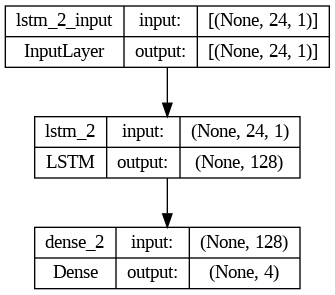

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelo, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

In [ ]:
# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80                # Hiperparámetro
BATCH_SIZE = 256           # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
    )

Epoch 1/80
157/157 - 9s - loss: 0.2351 - val_loss: 0.1143 - 9s/epoch - 56ms/step
Epoch 2/80
157/157 - 1s - loss: 0.1258 - val_loss: 0.1004 - 670ms/epoch - 4ms/step
Epoch 3/80
157/157 - 1s - loss: 0.1179 - val_loss: 0.0974 - 649ms/epoch - 4ms/step
Epoch 4/80
157/157 - 1s - loss: 0.1122 - val_loss: 0.0946 - 630ms/epoch - 4ms/step
Epoch 5/80
157/157 - 1s - loss: 0.1066 - val_loss: 0.0902 - 763ms/epoch - 5ms/step
Epoch 6/80
157/157 - 1s - loss: 0.1011 - val_loss: 0.0862 - 830ms/epoch - 5ms/step
Epoch 7/80
157/157 - 1s - loss: 0.0960 - val_loss: 0.0827 - 842ms/epoch - 5ms/step
Epoch 8/80
157/157 - 1s - loss: 0.0916 - val_loss: 0.0806 - 848ms/epoch - 5ms/step
Epoch 9/80
157/157 - 1s - loss: 0.0882 - val_loss: 0.0785 - 839ms/epoch - 5ms/step
Epoch 10/80
157/157 - 1s - loss: 0.0857 - val_loss: 0.0786 - 652ms/epoch - 4ms/step
Epoch 11/80
157/157 - 1s - loss: 0.0837 - val_loss: 0.0764 - 668ms/epoch - 4ms/step
Epoch 12/80
157/157 - 1s - loss: 0.0821 - val_loss: 0.0730 - 624ms/epoch - 4ms/step
Epo

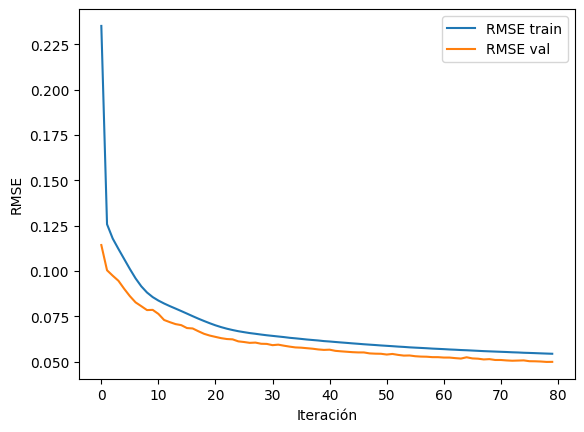

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

**Observaciones y sugerencias:**

- El modelo no tiene *overfitting* (algo similar a lo que ocurrió con el modelo univariado + uni-step)
- El modelo podría ser entrenado con un número mayor de iteraciones (hiperparámetro).
- Al igual que en el tutorial anterior, se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* y *OUTPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación:

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.051
  RMSE val:	 0.048
  RMSE test:	 0.055


Los desempeños son comparables, aunque con el set de prueba se obtiene un RMSE ligeramente superior al de entrenamiento.

De nuevo, esto podría mejorar con la afinación del modelo.

Ahora podemos ir un paso más allá y analizar el desempeño en detalle para el set de prueba.

Como en este caso tenemos 4 horas de predicciones (en lugar de 1 sola) podemos analizar cómo se comporta el error en las predicciones para cada una de las 4 horas predichas.

Para esto:
- Generaremos las predicciones sobre la totalidad del set de prueba con el modelo entrenado.
- Calcularemos y graficaremos el RMSE para cada instante de tiempo predicho


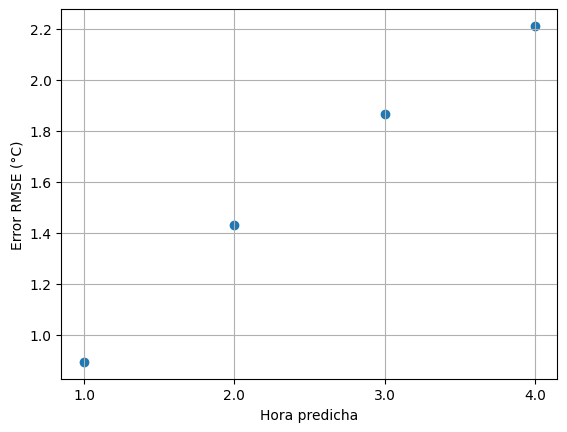

In [ ]:
# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)

# 2. Realizar la transformación inversa de las predicciones para llevar sus
# valores a la escala original
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# 3. Calcular RMSE para cada instante de tiempo predicho
diff_cuad = np.square(y_ts.squeeze()-y_ts_pred) # 4995x4
proms = np.mean(diff_cuad, axis=0) # 1x4
rmse = np.sqrt(proms) # 1x4

# Graficar rmse para cada timestep
t = np.linspace(1,4,4)

fig, ax = plt.subplots()
ax.scatter(t,rmse)
ax.set_xlabel('Hora predicha')
ax.set_ylabel('Error RMSE (°C)')
plt.xticks(ticks=t, labels=t)
plt.grid();

Vemos que el RMSE se incrementa a medida que pasan las horas predichas, pasando de un error de 0.5 °C para la primera hora a un error de un poco más de 2.2 °C para la cuarta hora.

Esto nos permite plantear algunas hipótesis:

- Probablemente un incremento en el número de horas predichas generará un incremento en el RMSE
- Se podría reducir el RMSE al afinar el modelo
- Se podría mejorar el desempeño usando un modelo multivariado - multistep

##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Usaremos la misma función `predecir` implementada en el video anterior:

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando las temperaturas originales y las predichas por el modelo para cada uno de los datos en el set de prueba:

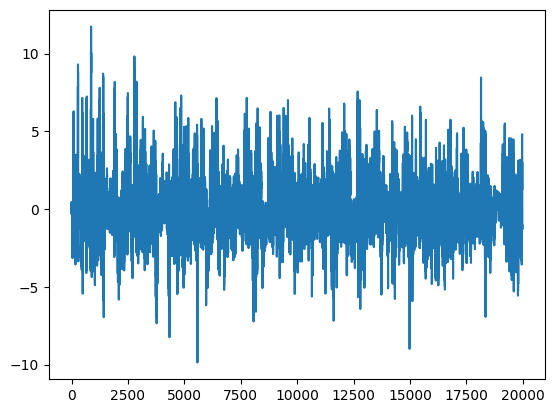

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -10 y +10 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

## 9. Conclusiones y sugerencias

- Hemos entrenado un segundo modelo univariado + multi-step
- Lo único que cambia en la implementación con respecto al modelo univariado + uni-step es la creación del set de datos supervisado y la creación de la Red LSTM.
- Se observa que el RMSE se incrementa a medida que aumentan las horas predichas, y que en generar los niveles de error para predicciones individuales aumentan con relación al modelo univariado + uni-step.
- El desempeño podría mejorar si se usa un enfoque de predicción diferente (por ejemplo multivariado + multi-step) o si se afina el modelo.

En el próximo video comenzaremos a enfocarnos en el desarrollo de modelos que aceptarán como entrada múltiples variables. Así que específicamente veremos cómo realizar predicciones usando el enfoque multivariado + uni-step.

=====================================     oooooooooo     =====================================

# **PARTE IV: Forecasting con Redes LSTM - MODELO MULTIVARIADO - UNISTEP**

- En los modelos multivariados-unistep ingresamos a la red múltiples variables y la predicción se hace sobre una sola variable y tan sólo para un instante de tiempo a futuro.

## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [*Feature engineering*](#scrollTo=Ex5fnN-tMD7c&line=25&uniqifier=1)
6. [Pre-procesamiento](#scrollTo=vd5lyqNrlfFg)
7. [Creación y entrenamiento del modelo](#scrollTo=016D9eVw3Beb)
8. [Desempeño del modelo](#scrollTo=ZkI9vr5S69i_)
9. [Predicciones con el modelo entrenado](#scrollTo=fvqk4f8L3aXE&line=1&uniqifier=1)
10. [Conclusiones y sugerencias](#scrollTo=0AFY2trj_KLo&line=1&uniqifier=1)

## 1. Introducción

En las partes anteriores se ha visto cómo realizar el pre-procesamiento de los datos y cómo implementar los dos primeros tipos de modelos predictivos usando los enfoques univariado-unistep y univariado-multistep.

En esta parte del Caso de Uso (Parte IV), se verá cómo implmentar el tercer tipo de modelo predictivo, en donde en lugar de una usaremos múltiples variables de entrada a la Red LSTM para predecir una sola variable y un sólo instante de tiempo. Así que nos enfocaremos en el modelo multivariado + uni-step.

De nuevo e aprovecha el código implementado anteriormente para, con sólo algunas modificaciones, lograr implementar la Red LSTM capaz de generar este tipo de predicciones, aunque en este caso añadiremos un paso adicional: algo que se conoce como **ingeniería de características o *feature engineering***.

##2. El set de datos

Recordar que se está usando el  [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos que contiene el registro histórico de 14 diferentes variables climáticas en el período entre 2009 y 2015.

En el segundo video de la serie realizamos el análisis exploratorio del dataset y realizamos este pre-procesamiento:

1. Hicimos el manejo de datos faltantes
2. Verificamos que el dataset no tuviese valores extremos
3. Re-interpolamos el dataset para garantizar una periodicidad de 1 hora

Este será el set de datos que usaremos en este tutorial.

##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque multivariado + uni-step:

![](https://drive.google.com/uc?export=view&id=1uq-buHEizcVfR5grXnSrMnwdfgNEzXMf)

En este caso tomaremos como entrada al modelo las 14 covariables disponibles en el dataset (de ahí el término multivariado) y a la salida intentaremos predecir 1 hora de temperatura a futuro (de ahí el término uni-step).

Específicamente tendremos que modificar en nuestro código:

1. **El pre-procesamiento** para crear el dataset supervisado con el número de covariables requerido a la entrada del modelo
2. **La Red LSTM**, que en lugar de una sola ahora deberá aceptar 14 variables de entrada (cada una con un registro de 24 horas).

##4. Lectura del set de datos

Recordemos que usaremos el dataset implementado en el [segundo video de la serie](https://youtu.be/R8MEPGn9sFI), sobre el cual ya hemos hecho un pre-procesamiento previo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer set de datos
ruta = '/content/drive/MyDrive/DataSet/Weather/'
df = pd.read_csv(ruta+'weather_dataset_preprocesado.csv', index_col='datetime')
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5


En este caso **NO** incluiremos la variable tiempo como una covariable, así que podremos eliminarla:

In [ ]:
df = df.reset_index()
df = df.drop(columns=['datetime'])
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50220,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50221,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50222,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


## 5. *Feature engineering*

En lugar de alimentar al modelo con los datos en bruto, aprovecharemos la relación existente entre algunas covariables para obtener una representación equivalente de las mismas.

Este proceso de tomar las covariables en bruto, procesarlas y modificarlas para generar nuevas características que alimenten el modelo se conoce como ingeniería de características.

En este caso nos enfocaremos sólo en las variables relacionadas con el viento:

1. `wv (m/s)`: velocidad del viento (en m/s)
2. `wd (deg)`: dirección del viento (en grados)
3. `max. wv (m/s)`: velocidad del viento máxima (en m/s)

En este caso optaremos por:

1. Eliminar `max. wv (m/s)` (pues resulta redundante, teniendo en cuenta que existe la covariable `wv (m/s)`)
2. Combinar `wv (m/s)` y `wd (deg)` usando una representación vectorial

![](https://drive.google.com/uc?export=view&id=1S9eqcTPkVTqcGKt-Z2GxDp7c-JKZNH41)

donde:

- $W_x = wv \cdot cos(wd)$
- $W_y = wv \cdot sin(wd)$

Este *feature engineering* hará que en lugar de 14 sean 13 las covariables que presentaremos al modelo:

In [ ]:
# Feature engineering
w_dir = df['wd (deg)']*np.pi/180
Wx = df['wv (m/s)']*np.cos(w_dir)
Wy = df['wv (m/s)']*np.sin(w_dir)

# Eliminar columnas irrelevantes
df.pop('wd (deg)')
df.pop('wv (m/s)')
df.pop('max. wv (m/s)')

# E incluir las columnas de interés
df['Wx'] = Wx
df['Wy'] = Wy
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy
0,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168
1,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701
2,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879
3,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603
4,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,-2.904532,0.300154
50220,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,-1.558297,0.191335
50221,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,-2.577624,-1.067687
50222,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,-2.832167,0.398035


##6. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%).
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

En cada una de estas fases usaremos prácticamente el mismo código usado en los modelos univariados pero con algunas ligeras modificaciones.

### 6.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

En este caso usaremos la misma función implementada para los modelos univariados con la diferencia de que en lugar de introducir una *serie* de Pandas, introduciremos el *DataFrame* completo.

Por tanto, la función retornará tres *dataframes* (train, val y test):

In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (40179, 13)
Tamaño set de validación: (5022, 13)
Tamaño set de prueba: (5023, 13)


Observemos que en lugar de una columna cada subset tiene ahora 13 (correspondientes a las covariables).

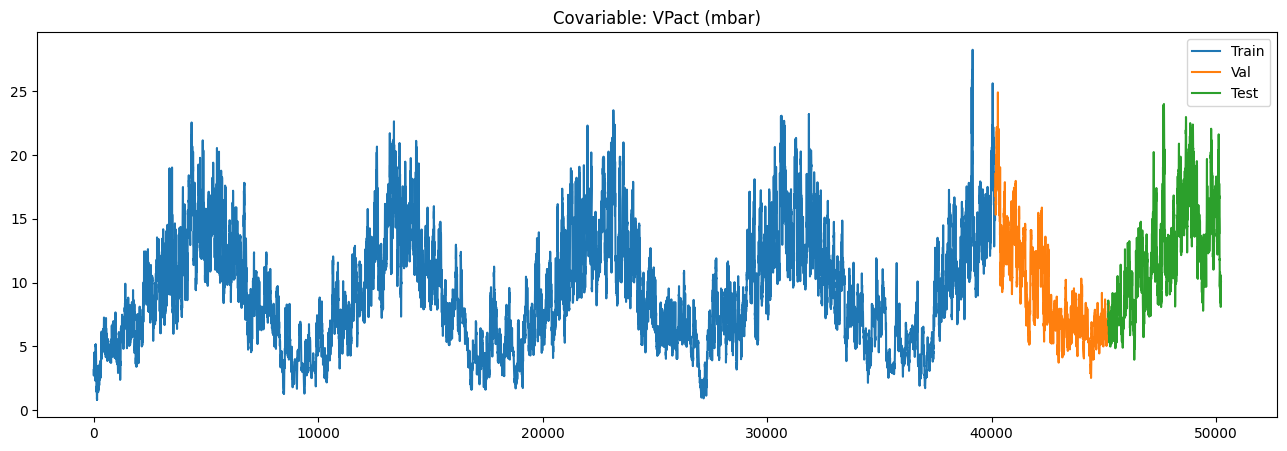

In [ ]:
covar = 6 # Índice de la covariable (columna del dataset) a graficar
col = df.columns[covar]

# Dibujar los sets de entrenamiento/validación/prueba para la covariable
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
ax.set_title(f'Covariable: {col}')
plt.legend();

###6.2 Generación del dataset supervisado (entrada y salida del modelo)

Debemos ajustar nuestro set de datos de acuerdo a lo especificado en la [documentación de las Redes LSTM en TensorFlow/Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM):

![](https://drive.google.com/uc?export=view&id=1SCdS0c9N7z5zhg6YxxY3rSSvphAFO83P)

Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 13 (features) correspondiente a la entrada
- Un arreglo de 1 (hora) x 1 (feature) correspondiente a la hora 25 (a predecir):

![](https://drive.google.com/uc?export=view&id=1SDF_aecVSZLoD6-bfsp55m7u09h2ysrk)

Como en los casos anteriores, el parámetro  `INPUT_LENGTH` se convierte en un hiperparámetro que terminará afectando el desempeño de la Red LSTM al momento de hacer las predicciones.

Y usaremos la misma función usada en los tutoriales anteriores:

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado <-- <--- ¡esta parte de la función se ejecuta en este caso!
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        # Entrada al modelo
        X.append(array[i:i+INPUT_LENGTH,0:cols])

        # Salida (el índice 1 corresponde a la columna con la variable a predecir)
        Y.append(array[i+input_length:i+input_length+output_length,1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (40154, 24, 13), y_tr: (40154, 1, 1)
Set de validación - x_vl: (4997, 24, 13), y_vl: (4997, 1, 1)
Set de prueba - x_ts: (4998, 24, 13), y_ts: (4998, 1, 1)


###6.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones.

En comparación con entradas univariadas, en este caso por tener múltiples variables de entrada se requiere escalar cada una de ellas a la entrada del modelo. Por tanto se creará un total de 13 escaladores (1 por cada covariable).

Sin embargo, a la salida del modelo seguiremos teniendo sólo 1 variable a predecir (la temperatura) y por tanto sólo es necesario escalar dicha variable en el arreglo *Y* de salida:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'T (degC)' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

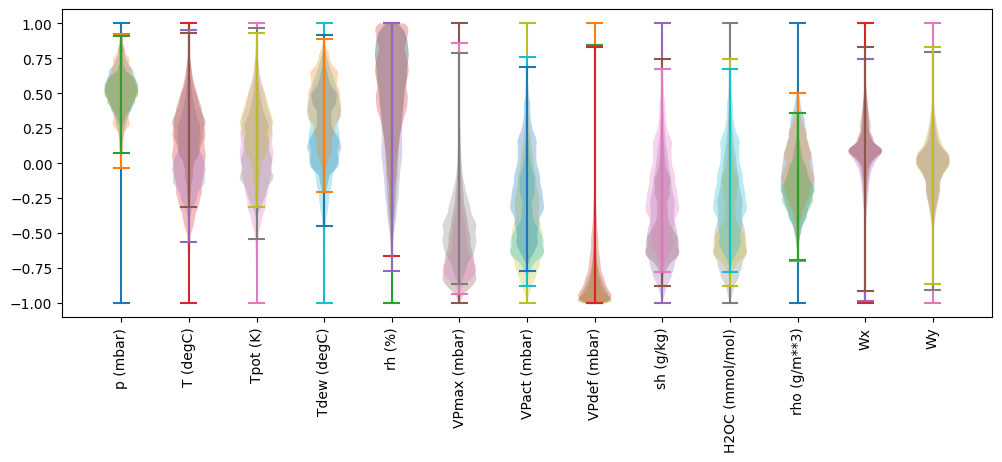

In [ ]:
# Y generemos una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(13):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(13)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale();

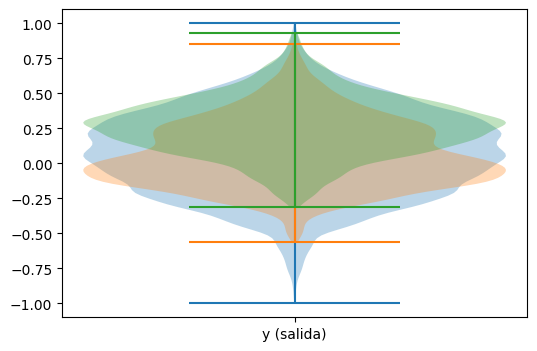

In [ ]:
# Y hagamos lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

##7. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 13)
- Salidas: arreglos *y* (batches x output-length x features = batches x 1 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

$RMSE = \sqrt{\frac{\sum_i (y_i-\hat{y_i})^2}{N}}$

donde:
- $y$: temperatura real
- $\hat{y}$: temperatura predicha
- $N$: cantidad de predicciones

***Importaciones y Ajuste de parámetros***

In [ ]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

***Definición del Modelo***

In [ ]:
# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 13 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo multivariado + uni-step es
# el tamaño deldato de salida
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

In [ ]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura

def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

***Compilación***

In [ ]:
# Compilación
optimizador = RMSprop(learning_rate=5e-4) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)


In [ ]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               72704     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 72,833
Trainable params: 72,833
Non-trainable params: 0
_________________________________________________________________


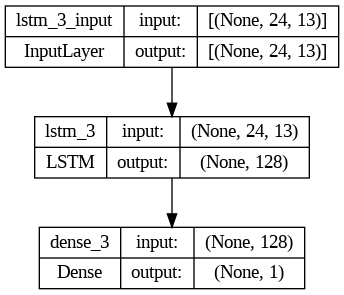

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelo, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

***Entrenamiento***

In [ ]:
# Entrenamiento (aproximadamente 1 min usando GPU)

EPOCHS = 80              # Hiperparámetro
BATCH_SIZE = 256         # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
157/157 - 4s - loss: 0.0750 - val_loss: 0.0416 - 4s/epoch - 26ms/step
Epoch 2/80
157/157 - 1s - loss: 0.0389 - val_loss: 0.0307 - 669ms/epoch - 4ms/step
Epoch 3/80
157/157 - 1s - loss: 0.0332 - val_loss: 0.0288 - 654ms/epoch - 4ms/step
Epoch 4/80
157/157 - 1s - loss: 0.0305 - val_loss: 0.0266 - 677ms/epoch - 4ms/step
Epoch 5/80
157/157 - 1s - loss: 0.0288 - val_loss: 0.0273 - 647ms/epoch - 4ms/step
Epoch 6/80
157/157 - 1s - loss: 0.0278 - val_loss: 0.0239 - 793ms/epoch - 5ms/step
Epoch 7/80
157/157 - 1s - loss: 0.0272 - val_loss: 0.0266 - 684ms/epoch - 4ms/step
Epoch 8/80
157/157 - 1s - loss: 0.0266 - val_loss: 0.0266 - 689ms/epoch - 4ms/step
Epoch 9/80
157/157 - 1s - loss: 0.0265 - val_loss: 0.0233 - 664ms/epoch - 4ms/step
Epoch 10/80
157/157 - 1s - loss: 0.0261 - val_loss: 0.0257 - 659ms/epoch - 4ms/step
Epoch 11/80
157/157 - 1s - loss: 0.0257 - val_loss: 0.0231 - 655ms/epoch - 4ms/step
Epoch 12/80
157/157 - 1s - loss: 0.0256 - val_loss: 0.0232 - 647ms/epoch - 4ms/step
Epo

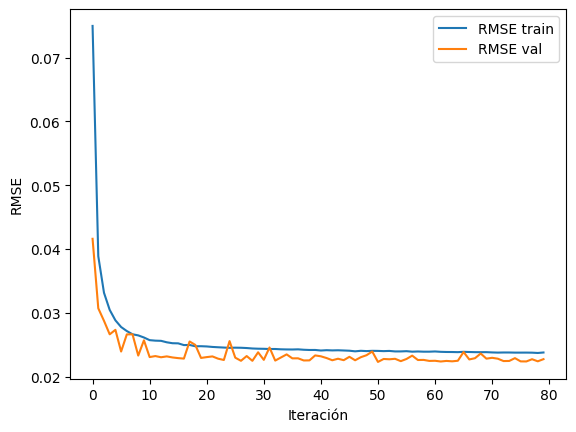

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

**Observaciones y sugerencias:**

- El modelo con entradas multivariadas parece tener un desempeño similar al obtenido con los modelos univariados (RMSEs del orden del 2%).

Para intentar mejorar el desempeño se sugiere:
- Hacer un análisis de relevancia de las variables (*feature importance*) y entrenar el modelo sólo con aquellas más relevantes.
- Afinar los hiperparámetros del modelo usando técnicas como, por ejemplo, *random grid search*:
  - *INPUT_LENGTH*
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


## 8. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación:

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.022
  RMSE val:	 0.022
  RMSE test:	 0.025


##9. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Usaremos la misma función `predecir` usada en los videos anteriores:

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando las temperaturas originales y las predichas por el modelo para cada uno de los datos en el set de prueba:

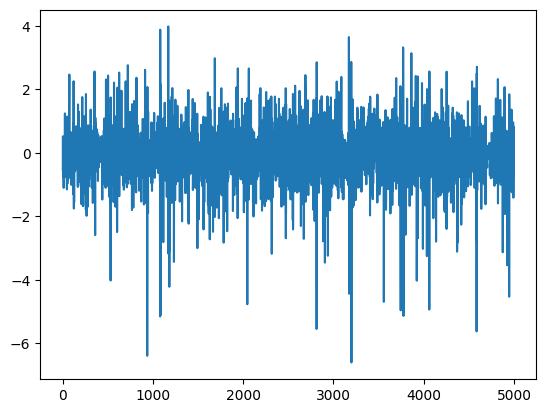

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +4 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

## 10. Conclusiones y sugerencias

- Hemos entrenado un tercer modelo multivariado + uni-step
- Un elemento adicional en este caso (al considerar múltiples variables de entrada) es el *feature engineering*.
- Tras analizar el desempeño del modelo vemos que este es ligeramente similar al obtenido en los videos anteriores con los modelos cuya entrada era una sola variable, aunque es necesario afinar todos los modelos para posteriormente poder comparar adecuadamente estos desempeños.

Además, en el caso de los modelos multivariados, se podría realizar lo que se conoce como **análisis de la importancia de las características** (o *feature importance*) para determinar cuáles covariables tienen un mayor impacto en la predicción.

Al determinar cuáles covariables tienen un mayor impacto se podría re-entrenar el modelo sólo con dichas covariables e intentar mejorar su desempeño.

En el próximo video veremos el último tipo de modelo más usado al momento de hacer predicciones.

Este modelo seguirá teniendo múltiples variables de entrada pero en lugar de un instante de tiempo haremos la predicción sobre múltiples instantes de tiempo.

Así que veremos cómo implementar una Red LSTM usando el enfoque multivariado + multi-step.

=============================================     ooooo     =============================================

# **PARTE V: Forecasting con Redes LSTM - MODELO MULTIVARIADO - MULTISTEP**


- En los modelos multivaridos-multistep en la cual alimentamos el modelo con múltiples variables e intentamos predecir una sola de ellas pero durante múltiples instantes de tiempo a futuro.
- El ejemplo en este caso sería la temperatura

## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [*Feature engineering*](#scrollTo=Ex5fnN-tMD7c&line=25&uniqifier=1)
6. [Pre-procesamiento](#scrollTo=vd5lyqNrlfFg)
7. [Creación y entrenamiento del modelo](#scrollTo=016D9eVw3Beb)
8. [Desempeño del modelo](#scrollTo=ZkI9vr5S69i_)
9. [Predicciones con el modelo entrenado](#scrollTo=fvqk4f8L3aXE&line=1&uniqifier=1)
10. [Conclusiones y sugerencias](#scrollTo=0AFY2trj_KLo&line=1&uniqifier=1)

## 1. Introducción

En el video anterior vimos cómo implementar una Red LSTM donde la entrada es un conjunto de múltiples variables y donde a la salida generamos un sólo instante de predicción a futuro.

En este último video de la serie video veremos un enfoque similar pero con la diferencia de que crearemos un modelo para predecir múltiples instantes de tiempo a futuro sobre una sola variable. Así que hablaremos del modelo multivariado + multistep.

Al igual que en los modelos anteriores, re-utilizaremos buena parte del código desarrollado hasta el momento y  haremos tan sólo algunas modificaciones para implementar este modelo de predicción.

##2. El set de datos

Recordemos que estamos usando el  [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos que contiene el registro histórico de 14 diferentes variables climáticas en el período entre 2009 y 2015.

En el segundo video de la serie realizamos el análisis exploratorio del dataset y realizamos este pre-procesamiento:

1. Hicimos el manejo de datos faltantes
2. Verificamos que el dataset no tuviese valores extremos
3. Re-interpolamos el dataset para garantizar una periodicidad de 1 hora

Este será el set de datos que usaremos en este tutorial.

##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque multivariado + uni-step:

![](https://drive.google.com/uc?export=view&id=1SeTLqMdmCDh9wXinTXxPij-jkqhOxXOx)

En este caso tomaremos como entrada al modelo 13 covariables (las mismas usadas en el video anterior) y a la salida intentaremos predecir 4 horas de temperatura a futuro (de ahí el término multi-step).

Específicamente, con respecto al video anterior (multivariado-unistep) tendremos que modificar en nuestro código:

1. **El pre-procesamiento** para crear el dataset supervisado con el número instantes de tiempo a predecir (4 horas)
2. **La Red LSTM**, que en lugar de un sólo instante de tiempo ahora debe generar 4 horas consecutivas de predicciones sobre la variable temperatura.

##4. Lectura del set de datos

Recordemos que usaremos el dataset implementado en el [segundo video de la serie](https://youtu.be/R8MEPGn9sFI), sobre el cual ya hemos hecho un pre-procesamiento previo:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer set de datos
ruta = '/content/drive/MyDrive/DataSet/Weather/'
df = pd.read_csv(ruta+'weather_dataset_preprocesado.csv', index_col='datetime')
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5


En este caso **NO** incluiremos la variable tiempo como una covariable, así que podremos eliminarla:

In [ ]:
df = df.reset_index()
df = df.drop(columns=['datetime'])
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50220,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50221,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50222,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


## 5. *Feature engineering*

Realizaremos la misma *ingeniería de características del video anterior*:

- A partir de la velocidad y dirección del viento (columnas `wv (m/s)` y `wd (deg)`) calcularemos 2 nuevas características: los componentes del vector viento (nuevas columnas `Wx` y `Wy`)
- Eliminaremos la columna `max. wv (m/s)` (velocidad del viento máxima (en m/s))

![](https://drive.google.com/uc?export=view&id=1SYGFg_Ugmt4oxlxm9mJTKtuxYHBSmP4w)

donde:

- $W_x = wv \cdot cos(wd)$
- $W_y = wv \cdot sin(wd)$

Así que, al igual que en el video anterior, tendremos 13 covariables de entrada al modelo:

In [ ]:
# Feature engineering
w_dir = df['wd (deg)']*np.pi/180
Wx = df['wv (m/s)']*np.cos(w_dir)
Wy = df['wv (m/s)']*np.sin(w_dir)

# Eliminar columnas irrelevantes
df.pop('wd (deg)')
df.pop('wv (m/s)')
df.pop('max. wv (m/s)')

# E incluir las columnas de interés
df['Wx'] = Wx
df['Wy'] = Wy
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy
0,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168
1,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701
2,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879
3,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603
4,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,-2.904532,0.300154
50220,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,-1.558297,0.191335
50221,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,-2.577624,-1.067687
50222,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,-2.832167,0.398035


##6. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%).
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

En cada una de estas fases usaremos prácticamente el mismo código usado en los modelos univariados pero con algunas ligeras modificaciones.

### 6.1. Partición del set en entrenamiento, validación y prueba

Esta fase es idéntica a la implementada en el modelo anterior (multivariado - unistep).

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

En este caso usaremos la misma función implementada para los modelos univariados con la diferencia de que en lugar de introducir una *serie* de Pandas, introduciremos el *DataFrame* completo.

Por tanto, la función retornará tres *dataframes* (train, val y test):

In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)       # Número de datos de entrenamiento
    Nval = int(vl_size*N)         # Número de datos de validación
    Ntst = N - Ntrain - Nval      # Número de datos de prueba

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df)

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (40179, 13)
Tamaño set de validación: (5022, 13)
Tamaño set de prueba: (5023, 13)


Observemos que en lugar de una columna cada subset tiene ahora 13 (correspondientes a las covariables).

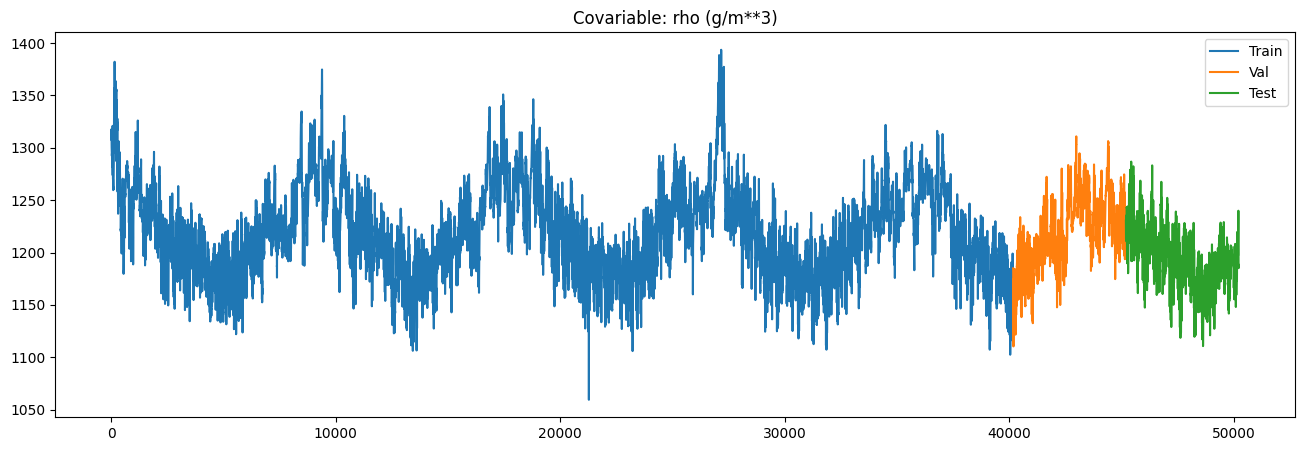

In [ ]:
covar = 10              # Índice de la covariable (columna del dataset) a graficar
col = df.columns[covar]

# Dibujar los sets de entrenamiento/validación/prueba para la covariable
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
ax.set_title(f'Covariable: {col}')
plt.legend();

###6.2 Generación del dataset supervisado (entrada y salida del modelo)

En este caso, con relación al modelo multivariado-multistep, cambiaremos el tamaño del dato de salida pues ahora se generarán 4 horas de predicciones consecutivas.

Debemos ajustar nuestro set de datos de acuerdo a lo especificado en la [documentación de las Redes LSTM en TensorFlow/Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM):

![](https://drive.google.com/uc?export=view&id=1SgWsPot-pAB0upTCSwWoY-KDnJFNMD3A)

Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 13 (features) correspondiente a la entrada
- Un arreglo de 4 (horas) x 1 (feature):

![](https://drive.google.com/uc?export=view&id=1ShGZPnrdSkE3HbPgcy26MQcswQlvwc4P)

En este caso, `INPUT_LENGTH` (24 horas) y `OUTPUT_LENGTH`(4 horas) se convertirán en hiperparámetros que más adelante se deberían afinar para mejorar el desempeño del modelo.

Y usaremos la misma función usada en los tutoriales anteriores:

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado <-- <--- ¡esta parte de la función se ejecuta en este caso!
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Hiperparámetro
OUTPUT_LENGTH = 4    # Modelo multi-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (40151, 24, 13), y_tr: (40151, 4, 1)
Set de validación - x_vl: (4994, 24, 13), y_vl: (4994, 4, 1)
Set de prueba - x_ts: (4995, 24, 13), y_ts: (4995, 4, 1)


###6.3 Escalamiento

Esta etapa es idéntica a la implementada en el modelo anterior (multivariado-unistep).

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones.

En comparación con entradas univariadas, en este caso por tener múltiples variables de entrada se requiere escalar cada una de ellas a la entrada del modelo. Por tanto se creará un total de 13 escaladores (1 por cada covariable).

Sin embargo, a la salida del modelo seguiremos teniendo sólo 1 variable a predecir (la temperatura) y por tanto sólo es necesario escalar dicha variable en el arreglo *Y* de salida:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input, col_ref):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    - data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})
    - col_ref: parámetro adicional para especificar la columna que contiene
      la variable a predecir


    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    # *** Implementación adicional: determinar el índice de la columna
    # que contiene la variable a predecir
    col_ref = df.columns.get_loc(col_ref)

    # Número de instantes de tiempo de entrada y de covariables
    NSAMPLES = data_input['x_tr'].shape[1]
    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (1 por cada covariable de entrada)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys (teniendo en cuenta "col_ind")
    y_tr_s[:,:,0] = scalers[col_ref].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[col_ref].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[col_ref].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[col_ref]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar (especificando la columna con la variable a predecir)
data_s, scaler = escalar_dataset(data_in, col_ref = 'T (degC)' )

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

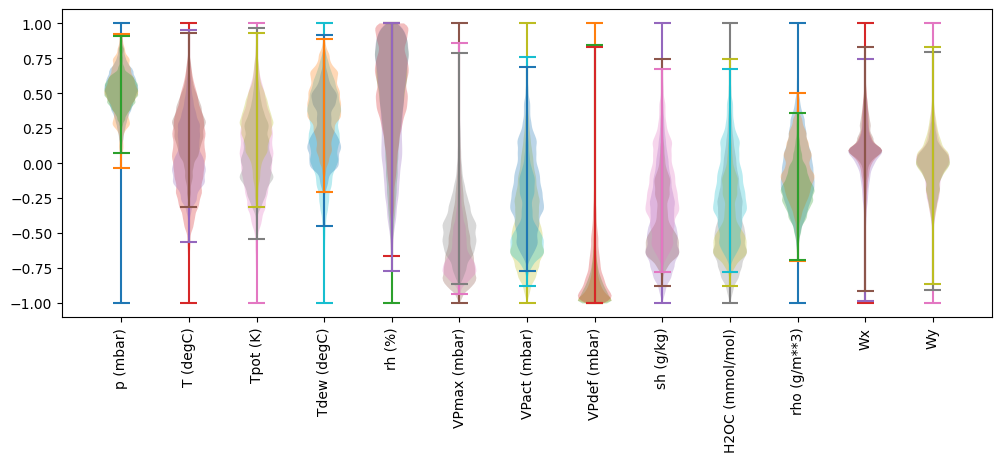

In [ ]:
# Y generemos una gráfica tipo violín para ver la distribución
# de los valores en cada covariable (entrada) y en la variable a
# predecir (salida)

fig, ax = plt.subplots(figsize=(12,4))
for i in range(13):
    ax.violinplot(dataset=x_tr_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_vl_s[:,:,i].flatten(), positions=[i])
    ax.violinplot(dataset=x_ts_s[:,:,i].flatten(), positions=[i])

# Etiquetas eje horizontal
ax.set_xticks(list(range(13)))
ax.set_xticklabels(df.keys(), rotation=90)
ax.autoscale();

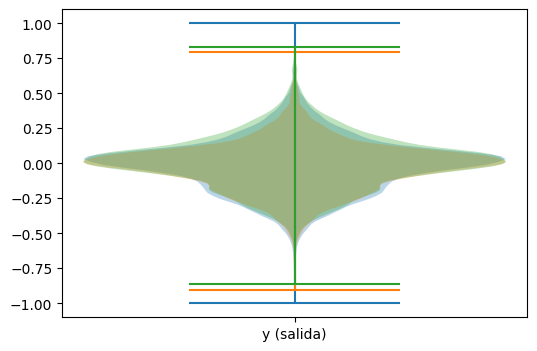

In [ ]:
# Y hagamos lo mismo con la variable de salida:
fig, ax = plt.subplots(figsize=(6,4))
ax.violinplot(dataset=y_tr_s.flatten())
ax.violinplot(dataset=y_vl_s.flatten())
ax.violinplot(dataset=y_ts_s.flatten())
ax.set_xticks([1])
ax.set_xticklabels(['y (salida)']);

##7. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 13)
- Salidas: arreglos *y* (batches x output-length x features = batches x 4 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

$RMSE = \sqrt{\frac{\sum_i (y_i-\hat{y_i})^2}{N}}$

donde:
- $y$: temperatura real
- $\hat{y}$: temperatura predicha
- $N$: cantidad de predicciones

***Importaciones y Ajuste de Parámetros***

In [ ]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

***Definición del Modelo***

In [ ]:
# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celdad de memoria (c) (128)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 13 (features)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))

# Y lo único que cambia con respecto al modelo multivariado + multi-step es
# el tamaño deldato de salida (4 horas)
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

In [ ]:
# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

***Compilación***

In [ ]:
# Compilación
optimizador = RMSprop(learning_rate=5e-4) # 5e-5
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

In [ ]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               72704     
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 73,220
Trainable params: 73,220
Non-trainable params: 0
_________________________________________________________________


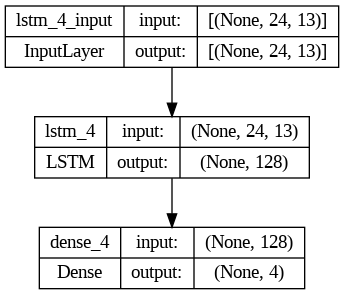

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelo, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

***Entrenamiento***

In [ ]:
# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80            # Hiperparámetro
BATCH_SIZE = 256       # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
157/157 - 3s - loss: 0.1490 - val_loss: 0.1351 - 3s/epoch - 19ms/step
Epoch 2/80
157/157 - 1s - loss: 0.1343 - val_loss: 0.1255 - 680ms/epoch - 4ms/step
Epoch 3/80
157/157 - 1s - loss: 0.1309 - val_loss: 0.1260 - 652ms/epoch - 4ms/step
Epoch 4/80
157/157 - 1s - loss: 0.1296 - val_loss: 0.1266 - 665ms/epoch - 4ms/step
Epoch 5/80
157/157 - 1s - loss: 0.1289 - val_loss: 0.1224 - 878ms/epoch - 6ms/step
Epoch 6/80
157/157 - 1s - loss: 0.1283 - val_loss: 0.1225 - 842ms/epoch - 5ms/step
Epoch 7/80
157/157 - 1s - loss: 0.1278 - val_loss: 0.1242 - 842ms/epoch - 5ms/step
Epoch 8/80
157/157 - 1s - loss: 0.1274 - val_loss: 0.1220 - 860ms/epoch - 5ms/step
Epoch 9/80
157/157 - 1s - loss: 0.1269 - val_loss: 0.1209 - 686ms/epoch - 4ms/step
Epoch 10/80
157/157 - 1s - loss: 0.1266 - val_loss: 0.1210 - 672ms/epoch - 4ms/step
Epoch 11/80
157/157 - 1s - loss: 0.1262 - val_loss: 0.1204 - 665ms/epoch - 4ms/step
Epoch 12/80
157/157 - 1s - loss: 0.1258 - val_loss: 0.1202 - 680ms/epoch - 4ms/step
Epo

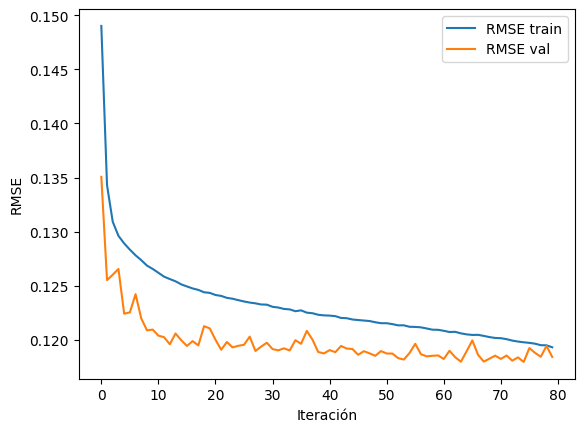

In [ ]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

**Observaciones y sugerencias:**

- En este caso (modelo multivariado-multistep) el desempeño obtenido (RMSE) es ligeramente inferior al obtenido en el caso del modelo anterior (multivariado-unistep). En este caso el RMSE es del orden de 0.12, mientras que en el modelo del tutorial anterior el desempeño era 0.10.
- En todo caso es importante tener en cuenta que se sugiere afinar los hiperparámetros de cada modelo para poder realizar comparaciones concluyentes.
- Al igual que en el caso del modelo multivariado-unistep en este caso, además de la afinación de hiperparámetros, se sugierer realizar un análisis de *feature importances* para determinar las covariables más relevantes en la predicción.

De nuevo, en la afinación se deberían considerar los siguientes hiperparámetros:
- *INPUT_LENGTH* y *OUTPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
- Número de unidades de la Red LSTM
- Pérdida
- Tasa de aprendizaje
- Epochs
- Batch size


## 8. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación:

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.115
  RMSE val:	 0.115
  RMSE test:	 0.124


El desempeño para el set de prueba es comparable
(aunque ligeramente inferior) con los sets de entrenamiento y validación y por tanto podemos concluir que el modelo generaliza adecuadamente.

De nuevo, se debería afinar el modelo + realizar análisis de *feature importances* para intentar mejorar el desempeño.

Al igual que hicimos con el modelo univariado-multistep analicemos los errores (RMSEs) individuales para cada una de las horas predichas, para lo cual:

1. Generaremos las predicciones sobre la totalidad del set de prueba con el modelo entrenado.
2. Calcularemos y graficaremos el RMSE para cada instante de tiempo predicho

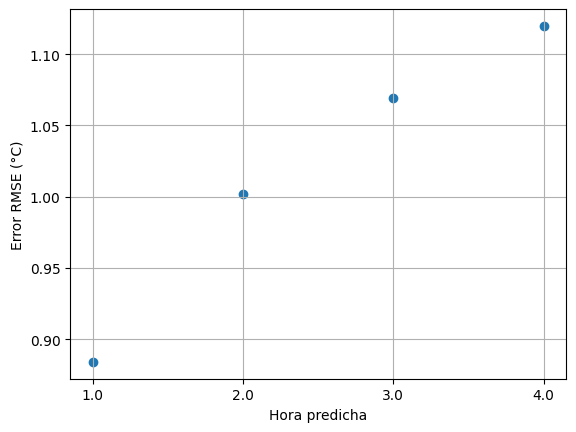

In [ ]:
# 1. Generar las predicciones sobre el set de prueba
y_ts_pred_s = modelo.predict(x_ts_s, verbose=0)

# 2. Realizar la transformación inversa de las predicciones para llevar sus
# valores a la escala original
y_ts_pred = scaler.inverse_transform(y_ts_pred_s)

# 3. Calcular RMSE para cada instante de tiempo predicho
diff_cuad = np.square(y_ts.squeeze()-y_ts_pred) # BATCHESx4
proms = np.mean(diff_cuad, axis=0) # 1x4
rmse = np.sqrt(proms) # 1x4

# Graficar rmse para cada timestep
t = np.linspace(1,4,4)

fig, ax = plt.subplots()
ax.scatter(t,rmse)
ax.set_xlabel('Hora predicha')
ax.set_ylabel('Error RMSE (°C)')
plt.xticks(ticks=t, labels=t)
plt.grid();

Y al igual que ocurría con el modelo univariado-multistep, vemos que en este caso el RMSE se incrementa a medida que nos movemos más hacia adelante en las predicciones.

De nuevo esto es un resultado preliminar y se sugiere afinar los hiperparámetros y realizar un análisis de *feature importances* para intentar mejorar este desempeño.

##9. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Usaremos la misma función `predecir` usada en los videos anteriores:

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando las temperaturas originales y las predichas por el modelo para cada uno de los datos en el set de prueba:

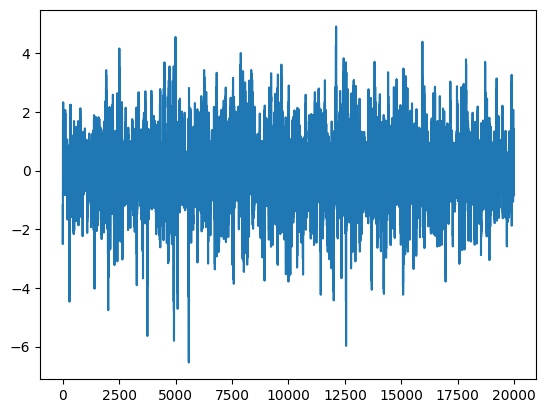

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred.flatten()
plt.plot(errores);

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +5 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

## 10. Conclusiones y sugerencias

- Hemos entrenado un cuarto modelo multivariado + multistep
- Al igual que con el modelo multivariado-unistep del video anterior, en este caso hemos incluido una etapa de ingeniería de características antes de crear el dataset supervisado.
- Para intentar mejorar el desempeño del modelo se sugiere afinar sus hiperparámetros y realizar un análisis de *feature importances*.

Y con esto terminamos esta serie de videos en donde hemos visto los principales tipos de enfoques y de Redes LSTM que podemos usar para generar predicciones sobre series de tiempo.

Sin embargo, en estos videos no hemos analizado otros elementos como por ejemplo el uso de la variable tiempo como covariable a la entrada de los modelos, o el análisis de importancia de las características para determinar cuáles covariables son más relevantes durante la predicción. Estos aspectos los podríamos analizar en otros videos más adelante.